## Analyze A/B Test Results

### Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, we will be working to understand the results of an A/B test run by an e-commerce website in order to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Import necessary packages including numpy, pandas,random and matplotlib
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Load 'ab_data.csv'
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Get the number of rows and columns of the dataframe
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#Get the number of unique users in the dataset
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
#Proportion of users converted
len(df.query('converted==1'))/df.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Count number of times new_page and treatment don't line up together
df.query('(group=="treatment" & landing_page!="new_page")|(group!="treatment" & landing_page=="new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [7]:
# Get the non-null values and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. Store your new dataframe in **df2**.

In [8]:
#Dropping the rows where treatment is not aligned with new_page or control is not aligned with old_page
df2=df.drop(df.query('(group=="treatment" & landing_page!="new_page")|(group!="treatment" & landing_page=="new_page")|(group=="control" & landing_page!="old_page")|(group!="control" & landing_page=="old_page")').index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to update the dataset.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Finding the duplicates in user_id column
x=df2['user_id'].duplicated()
df2[x]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[x]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Removal of row with duplicate user_id
df2=df2[~x]

In [14]:
#Get the non-null values and datatypes of each column after removal of row with duplicate user_id
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to calculate probabilities.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
#Calculating probability of individuals converted
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
#Calculating probability of individuals of the control group who converted
df2.query('group=="control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Calculating probability of individuals of the treatment group who converted
df2.query('group=="treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#Calculating probability of individuals who recieved new_page
len(df2.query('landing_page=="new_page"'))/df2.shape[0]

0.5000619442226688

e. Consider the results from a. through d. above, and explain whether there is sufficient evidence to say that the new treatment page leads to more conversions.

**We observe that**
<ul>
    <li>11.95% individuals convert regardless of the page they recieve. </li>
    <li>12.3% individuals in the control group converted..</li>
    <li>11.88% individuals in the treatment group converted.</li>
    <li>50% individuals recieved new page.</li>
</ul>
This evidence is not suffficient to say that the new treatment page leads to more conversions since the percentage of individuals in treatment group converted is less than that of individuals converted in the control group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should our null and alternative hypotheses be? **$p_{old}$** and **$p_{new}$**, are the converted rates for the old and new pages.

**Null Hypothesis = The convert rate for new_page is equal to or less than the convert rate for old_page,** 


**Alternative Hypothesis = The convert rate for new_page is greater than convert rate for old_page**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
#Calcuating the probability of convert rate for new_page
p_new=df2.query('converted==1').count()[0]/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
#Calcuating the probability of convert rate for old_page
p_old=df2.query('converted==1').count()[0]/df2.shape[0]
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
#Calculating total count of new_page
n_new=df2.query('landing_page=="new_page"')['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [22]:
#Calculating total count of old_page
n_old=df2.query('landing_page=="old_page"')['user_id'].count()
n_old

145274

e. Simulating $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#Simulating total no. of new_page transactions with a convert rate of new_page. 
new_page_converted=np.random.choice([0,1], n_new, p=(p_new,1-p_new))

f. Simulating $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#Simulating total no. of old_page transactions with a convert rate of old_page.
old_page_converted=np.random.choice([0,1], n_old, p=(p_old,1-p_old))

g. Finding $p_{new}$ - $p_{old}$ for our simulated values from part (e) and (f).

In [25]:
#Calculating difference in convert rates of new and old page
obs_diff=new_page_converted.mean()-old_page_converted.mean()
obs_diff

0.0001810278802659715

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one we calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Create a sampling distribution of the difference in convert rates
# with bootstrapping
p_diffs=[]
size=df2.shape[0]
for _ in range(10000):
    b_samp=df2.sample(size, replace=True)
    p_new=b_samp.query('converted==1').count()[0]/b_samp.shape[0]
    p_old=b_samp.query('converted==1').count()[0]/b_samp.shape[0]
    n_new=b_samp.query('landing_page=="new_page"')['user_id'].count()
    n_old=b_samp.query('landing_page=="old_page"')['user_id'].count()
    new_page_converted=np.random.choice([0,1], n_new, p=(p_new,1-p_new))
    old_page_converted=np.random.choice([0,1], n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  

In [27]:
#Storing values in numpy array
p_diffs=np.array(p_diffs)

(array([   6.,  108.,  554., 1608., 2810., 2719., 1558.,  528.,  103.,
           6.]),
 array([-4.55858746e-03, -3.64392173e-03, -2.72925600e-03, -1.81459026e-03,
        -8.99924531e-04,  1.47412016e-05,  9.29406935e-04,  1.84407267e-03,
         2.75873840e-03,  3.67340413e-03,  4.58806987e-03]),
 <a list of 10 Patch objects>)

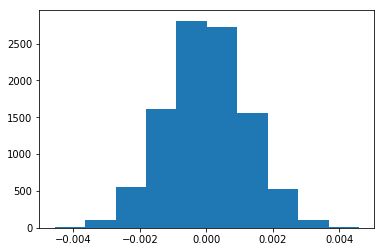

In [28]:
#Plotting histogram of the sampling distribution
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
#Simulate distribution under the null hypothesis
null_vals=np.random.normal(0,p_diffs.std(), p_diffs.size)

(array([  10.,   69.,  411., 1279., 2551., 2869., 1931.,  680.,  170.,
          30.]),
 array([-0.00471673, -0.00381952, -0.0029223 , -0.00202509, -0.00112788,
        -0.00023066,  0.00066655,  0.00156376,  0.00246098,  0.00335819,
         0.00425541]),
 <a list of 10 Patch objects>)

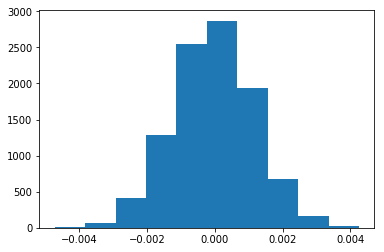

In [30]:
#Plotting histogram of the null distribution
plt.hist(null_vals)

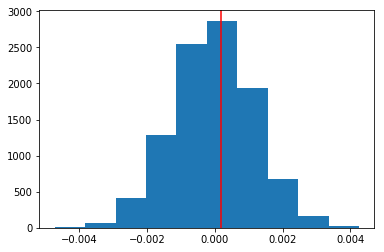

In [31]:
# Plot observed statistic with the null distibution
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [32]:
#Compute p-value
(null_vals>obs_diff).mean()

0.4309

k. In words, explain what we just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value computed above is called p-value in scientific studies. P-value indicates conditional proability of our data given that the null hypothesis is true. A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis.**

So, in this case we fail to reject our null hypothesis since p-value is 0.4309. In other words, this value means that there is a difference between the new and old pages. The probability of convert rate is more for old page as compared to new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page=="old_page" & converted==1')['user_id'].count()
convert_new = df2.query('landing_page=="new_page" & converted==1')['user_id'].count()
n_old = df2.query('landing_page=="old_page"')['user_id'].count()
n_new = df2.query('landing_page=="new_page"')['user_id'].count()

m. Now using `stats.proportions_ztest` to compute our test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score,p_value=sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative='larger')
print(z_score)
print(p_value)

-1.3109241984234394
0.9050583127590245


In [35]:
from scipy.stats import norm
norm.cdf(z_score)
# Tells us how significant our z-score is

0.09494168724097551

In [36]:
norm.ppf(1-(0.05/2))
# Tells us what our critical value at 95% confidence is

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since the z-score of 1.3109241984234394 exceeds the critical value of 1.959963984540054, we fail to reject the null hypothesis that is,the convert rate for new_page is equal to or less than the convert rate for old_page**

Also, the result agree with findings in previous parts, i.e., j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result acheived in the previous A/B test can also be acheived by performing regression.<br><br>


a. **Logistic Regression will be performed since the variable which is to be predicted is categorical**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Creating intercept
df2['intercept']=1

In [38]:
#Creating dummy variables
group_dummies=pd.get_dummies(df2['group'])
df2=df2.join(group_dummies)

In [39]:
page_dummies=pd.get_dummies(df2['landing_page'])
df2=df2.join(page_dummies)

In [40]:
#Renaming dummy variables columns
df2=df2.rename(columns={"treatment":"ab_page"})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,new_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,1


In [42]:
df2=df2.drop('control',axis=1)

c. Using **statsmodels** to import our regression model.  Instantiate the model, and fit the model using the two columns we created in part **b.** to predict whether or not an individual converts.

In [46]:
#Fitting logistic Regression model And Obtain the Results
logit_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Providing the summary of the model below

In [47]:
#Interpreting results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 13 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        02:36:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [48]:
#Exponentiation of result
np.exp(-0.0150)

0.9851119396030626

**Results :-**
Conversion is 0.98 times as likely for treatment group than control group holding all else constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**The p-value associated with ab_page is 0.190**

It differ from the value in Part II because in A/B Test, the null and alternative hypothesis were as follows:-

Null Hypothesis = The convert rate for new_page is equal to or less than the convert rate for old_page 

Alternative Hypothesis = The convert rate for new_page is greater than convert rate for old_page

f. Now, we are considering other things that might influence whether or not an individual converts. Why it is a good idea to consider other factors to add into our regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factors to add into our regression model since with more factors,more accurate results can be achieved.**

**Disadvantage of adding additional items into our regression model is that it will make our model complex**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. We will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **We will need two columns for the three dummy variables.** 

In [49]:
#Merging datasets
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.tail(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
user_id,,,,,,,,,
635122,US,2017-01-20 13:07:51.125996,control,old_page,0,1,0,0,1
757673,UK,2017-01-03 21:17:23.416244,treatment,new_page,0,1,1,1,0
870839,US,2017-01-15 21:22:00.479523,treatment,new_page,0,1,1,1,0
659679,US,2017-01-14 23:49:33.712246,treatment,new_page,0,1,1,1,0
674173,US,2017-01-21 21:21:36.827588,treatment,new_page,0,1,1,1,0
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0


In [50]:
df_new.nunique()

country              3
timestamp       290584
group                2
landing_page         2
converted            2
intercept            1
ab_page              2
new_page             2
old_page             2
dtype: int64

In [51]:
# Create the necessary dummy variables
country_dummies=pd.get_dummies(df_new['country'])
df_new=df_new.join(country_dummies)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# Fit Your Logistic regression Model And Obtain the Results
df_new['intercept']=1
logit_mod=sm.Logit(df_new['converted'],df_new[['intercept','old_page','UK','US']])
results2=logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [56]:
#Interpreting results
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 13 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        02:40:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0450      0.027    -76.820      0.000      -2.097      -1.993
old_page       0.0149      0.011      1.307      0.191      -0.007       0.037
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [57]:
#Exponentiation of result
np.exp(0.0149),np.exp(0.0506),np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

**Results**

Conversion is 1.01 times as likely on old page than new page holding all else constant

Conversion is 1.05 times as likely in UK country than CA country holding all else constant.

Conversion is 1.04 times as likely in US country than CA country holding all else constant.

<a id='conclusions'></a>
## Conclusions

Following conclusions can be drawn after analyzing A/B test results:-
<ol>
    <li>By finding proababilities of different factors and groups, a sufficient evidence is not obtained in order to draw a particular conclusion. This phenomena is called Simpson's Paradox in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. So, we cannot rely on probability results. </li>
    <li>After performing the A/B test using hypothesis testing and sampling distribution, we fail to reject the null hypothesis i.e., it shows that convert rate for new page is equal to or worse than the old page. In other words, old page has more convertion rate than new page. </li>
    <li>From the logistic regression model, we observe that conversion is 0.98 times as likely for treatment group than control group holding all else constant.This means mostly individuals converted from new page to old page. </li>
    <li>Also after adding the page and country matrix, the results show that conversion rates are not affected by them.</li>
    <li>So, we conclude that the convertion rate for new page is worse than old page, hence the company should not implement the new page   </li>
</ol>